In [452]:
from optimizer_supervised import Optimizer
from model import TransformerModel
from Hamiltonian import Ising

In [453]:
import numpy as np
import torch

In [454]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    # Set the device to GPU
    device = torch.device("cuda")
    print("GPU is available")
else:
    # Set the device to CPU
    device = torch.device("cpu")
    print("GPU is not available, using CPU")

# Example usage: Move a tensor to the selected device
x = torch.tensor([1, 2, 3])
x = x.to(device)

GPU is available


In [455]:
torch.set_default_tensor_type(
    torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
)

In [456]:
system_sizes = np.arange(8, 21, 2).reshape(-1, 1)
Hamiltonians = [Ising(size, periodic=True) for size in system_sizes]
param_dim = Hamiltonians[0].param_dim
embedding_size = 32
n_head = 8
n_hid = embedding_size
n_layers = 8
dropout = 0
minibatch = 10000

print("Sizes:", system_sizes)
print("Hamiltonians:", Hamiltonians)
print("Param dim:", param_dim)

Sizes: [[ 8]
 [10]
 [12]
 [14]
 [16]
 [18]
 [20]]
Hamiltonians: [<Hamiltonian.Ising object at 0x7cf4c14c1610>, <Hamiltonian.Ising object at 0x7cf4c14c1ac0>, <Hamiltonian.Ising object at 0x7cf4c14c2d50>, <Hamiltonian.Ising object at 0x7cf4c14c0dd0>, <Hamiltonian.Ising object at 0x7cf4c14c0f80>, <Hamiltonian.Ising object at 0x7cf4c1531400>, <Hamiltonian.Ising object at 0x7cf4c1530620>]
Param dim: 1


/home/spandan/Projects/tqs/Hamiltonian_utils.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  system_size = torch.tensor(system_size, dtype=torch.int64).reshape(-1)


In [457]:
model = TransformerModel(
    system_sizes,
    param_dim,
    embedding_size,
    n_head,
    n_hid,
    n_layers,
    dropout=dropout,
    minibatch=minibatch,
)

/home/spandan/anaconda3/envs/tqs2/lib/python3.12/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer was not TransformerEncoderLayer
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [458]:
param_range = None
point_of_interest = None
use_SR = False

In [459]:
optim = Optimizer(model, Hamiltonians, point_of_interest=point_of_interest)

In [460]:
import os

results_dir = "results"
paper_checkpoint_name = "ckpt_100000_Ising_32_8_8_0.ckpt"
paper_checkpoint_path = os.path.join(results_dir, paper_checkpoint_name)
checkpoint = torch.load(paper_checkpoint_path)
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [461]:
# optim.train(
#     100,
#     batch=1000000,
#     max_unique=100,
#     param_range=param_range,
#     fine_tuning=False,
#     use_SR=use_SR,
#     ensemble_id=int(use_SR),
# )

In [462]:
system_size = torch.tensor([8])
param = torch.tensor([1])
model.set_param(system_size=system_size, param=param)

print(model.param)
print(model.system_size)

tensor([1])
tensor([8])


In [463]:
# H = Hamiltonians[0]
# batch = 100
# max_unique = 10
#
# loss, log_amp, log_phase, sample_weight, Er, Ei, E_var = optim.minimize_energy_step(
#     H, batch, max_unique, use_symmetry=True
# )
#
# print("Loss:", loss)

In [464]:
from model_utils import compute_psi

In [465]:
H = Hamiltonians[0]
basis = torch.tensor(H.generate_basis())
symmetry = H.symmetry
log_amp, log_phase = compute_psi(model, basis, symmetry, check_duplicate=True)
print("Log_amp:", log_amp)
print("Log_phase:", log_phase)

Log_amp: tensor([-2.1063, -3.5020, -4.4347, -3.9910, -4.5754, -5.6357, -5.1850, -4.2139,
        -4.6122, -5.8986, -6.6387, -5.9711, -5.4433, -6.2287, -5.4720, -4.2822,
        -4.6122, -5.9522, -6.8316, -6.2947, -6.8066, -7.7291, -7.1625, -6.0609,
        -5.5012, -6.6598, -7.2527, -6.3932, -5.7572, -6.3724, -5.5133, -4.2139,
        -4.5754, -5.9320, -6.8459, -6.3498, -6.9398, -7.9307, -7.4386, -6.3932,
        -6.8066, -8.0138, -8.6871, -7.9116, -7.3801, -8.0499, -7.2395, -5.9711,
        -5.4433, -6.7123, -7.5403, -6.8796, -7.3801, -8.1650, -7.5054, -6.2947,
        -5.7572, -6.8140, -7.3315, -6.3498, -5.7366, -6.2483, -5.3487, -3.9910,
        -4.4347, -5.8027, -6.7256, -6.2483, -6.8459, -7.8620, -7.3858, -6.3724,
        -6.8316, -8.0735, -8.7807, -8.0499, -7.5403, -8.2569, -7.4702, -6.2287,
        -6.6387, -7.9333, -8.7807, -8.1650, -8.6871, -9.5224, -8.9023, -7.7291,
        -7.2527, -8.3405, -8.8809, -7.9307, -7.3315, -7.8620, -6.9826, -5.6357,
        -5.1850, -6.5075, -7.38

In [466]:
print(torch.tensor(H.generate_basis())[4])

tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])


It's quite nice that the phases are a periodic sequence:


In [467]:
amp = torch.sqrt(torch.exp(log_amp))
phase = torch.exp(log_phase)

print("Amplitude:", amp)
print("Phase:", phase)

Amplitude: tensor([0.3488, 0.1736, 0.1089, 0.1359, 0.1015, 0.0597, 0.0748, 0.1216, 0.0996,
        0.0524, 0.0362, 0.0505, 0.0658, 0.0444, 0.0648, 0.1175, 0.0996, 0.0510,
        0.0328, 0.0430, 0.0333, 0.0210, 0.0278, 0.0483, 0.0639, 0.0358, 0.0266,
        0.0409, 0.0562, 0.0413, 0.0635, 0.1216, 0.1015, 0.0515, 0.0326, 0.0418,
        0.0311, 0.0190, 0.0243, 0.0409, 0.0333, 0.0182, 0.0130, 0.0191, 0.0250,
        0.0179, 0.0268, 0.0505, 0.0658, 0.0349, 0.0230, 0.0321, 0.0250, 0.0169,
        0.0235, 0.0430, 0.0562, 0.0331, 0.0256, 0.0418, 0.0568, 0.0440, 0.0690,
        0.1359, 0.1089, 0.0549, 0.0346, 0.0440, 0.0326, 0.0196, 0.0249, 0.0413,
        0.0328, 0.0177, 0.0124, 0.0179, 0.0230, 0.0161, 0.0239, 0.0444, 0.0362,
        0.0189, 0.0124, 0.0169, 0.0130, 0.0086, 0.0117, 0.0210, 0.0266, 0.0154,
        0.0118, 0.0190, 0.0256, 0.0196, 0.0305, 0.0597, 0.0748, 0.0386, 0.0249,
        0.0331, 0.0243, 0.0154, 0.0203, 0.0358, 0.0278, 0.0158, 0.0117, 0.0182,
        0.0235, 0.0177, 0.026

In [468]:
psi_predicted = amp * torch.exp(1j * phase)
print(psi_predicted)

tensor([0.3186+0.1420j, 0.0645-0.1612j, 0.0631-0.0888j, 0.1241+0.0555j,
        0.0553-0.0851j, 0.0545+0.0245j, 0.0683+0.0306j, 0.0792-0.0923j,
        0.0559-0.0825j, 0.0478+0.0214j, 0.0330+0.0148j, 0.0402-0.0306j,
        0.0600+0.0269j, 0.0431-0.0107j, 0.0574-0.0302j, 0.1073+0.0480j,
        0.0559-0.0825j, 0.0465+0.0209j, 0.0300+0.0134j, 0.0265-0.0338j,
        0.0304+0.0136j, 0.0209-0.0015j, 0.0203-0.0190j, 0.0441+0.0197j,
        0.0583+0.0261j, 0.0251-0.0255j, 0.0239-0.0118j, 0.0373+0.0167j,
        0.0239-0.0509j, 0.0377+0.0169j, 0.0579+0.0260j, 0.0792-0.0923j,
        0.0553-0.0851j, 0.0470+0.0211j, 0.0298+0.0134j, 0.0325-0.0263j,
        0.0284+0.0127j, 0.0190+0.0003j, 0.0129-0.0205j, 0.0373+0.0167j,
        0.0304+0.0136j, 0.0174-0.0051j, 0.0118-0.0055j, 0.0175+0.0078j,
        0.0162-0.0190j, 0.0163+0.0073j, 0.0244+0.0110j, 0.0402-0.0306j,
        0.0600+0.0269j, 0.0323-0.0131j, 0.0151-0.0174j, 0.0293+0.0131j,
        0.0162-0.0190j, 0.0154+0.0069j, 0.0214+0.0096j, 0.0265-0

In [469]:
energy, psi_true = H.calc_ground(param=1)
psi_true = torch.tensor(psi_true)
print(psi_true)

tensor([ 0.4591, -0.1292, -0.1292,  0.0774, -0.1292,  0.0404,  0.0774, -0.0607,
        -0.1292,  0.0378,  0.0404, -0.0274,  0.0774, -0.0274, -0.0607,  0.0564,
        -0.1292,  0.0375,  0.0378, -0.0246,  0.0404, -0.0137, -0.0274,  0.0247,
         0.0774, -0.0246, -0.0274,  0.0221, -0.0607,  0.0247,  0.0564, -0.0607,
        -0.1292,  0.0378,  0.0375, -0.0246,  0.0378, -0.0128, -0.0246,  0.0221,
         0.0404, -0.0128, -0.0137,  0.0110, -0.0274,  0.0113,  0.0247, -0.0274,
         0.0774, -0.0246, -0.0246,  0.0192, -0.0274,  0.0110,  0.0221, -0.0246,
        -0.0607,  0.0221,  0.0247, -0.0246,  0.0564, -0.0274, -0.0607,  0.0774,
        -0.1292,  0.0404,  0.0378, -0.0274,  0.0375, -0.0137, -0.0246,  0.0247,
         0.0378, -0.0128, -0.0128,  0.0113, -0.0246,  0.0110,  0.0221, -0.0274,
         0.0404, -0.0137, -0.0128,  0.0110, -0.0137,  0.0060,  0.0110, -0.0137,
        -0.0274,  0.0110,  0.0113, -0.0128,  0.0247, -0.0137, -0.0274,  0.0404,
         0.0774, -0.0274, -0.0246,  0.02

Is it just a phase difference?


In [470]:
modulus = torch.abs(psi_predicted)
print(modulus)

tensor([0.3488, 0.1736, 0.1089, 0.1359, 0.1015, 0.0597, 0.0748, 0.1216, 0.0996,
        0.0524, 0.0362, 0.0505, 0.0658, 0.0444, 0.0648, 0.1175, 0.0996, 0.0510,
        0.0328, 0.0430, 0.0333, 0.0210, 0.0278, 0.0483, 0.0639, 0.0358, 0.0266,
        0.0409, 0.0562, 0.0413, 0.0635, 0.1216, 0.1015, 0.0515, 0.0326, 0.0418,
        0.0311, 0.0190, 0.0243, 0.0409, 0.0333, 0.0182, 0.0130, 0.0191, 0.0250,
        0.0179, 0.0268, 0.0505, 0.0658, 0.0349, 0.0230, 0.0321, 0.0250, 0.0169,
        0.0235, 0.0430, 0.0562, 0.0331, 0.0256, 0.0418, 0.0568, 0.0440, 0.0690,
        0.1359, 0.1089, 0.0549, 0.0346, 0.0440, 0.0326, 0.0196, 0.0249, 0.0413,
        0.0328, 0.0177, 0.0124, 0.0179, 0.0230, 0.0161, 0.0239, 0.0444, 0.0362,
        0.0189, 0.0124, 0.0169, 0.0130, 0.0086, 0.0117, 0.0210, 0.0266, 0.0154,
        0.0118, 0.0190, 0.0256, 0.0196, 0.0305, 0.0597, 0.0748, 0.0386, 0.0249,
        0.0331, 0.0243, 0.0154, 0.0203, 0.0358, 0.0278, 0.0158, 0.0117, 0.0182,
        0.0235, 0.0177, 0.0269, 0.0524, 

In [471]:
import pandas as pd
import matplotlib.pyplot as plt

array([[<Axes: title={'center': '0'}>]], dtype=object)

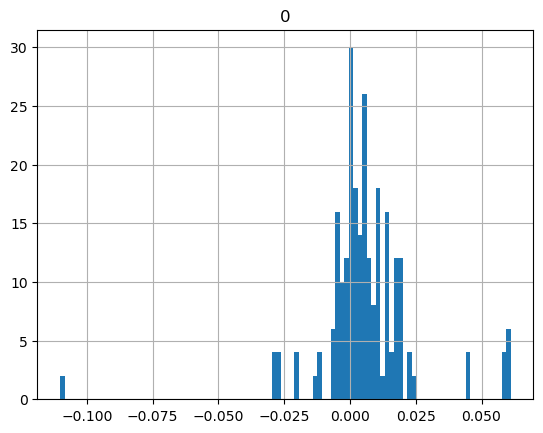

In [472]:
diffs = modulus - torch.abs(psi_true)
diffs = diffs.cpu().detach().numpy()
diffs_df = pd.DataFrame(diffs)
diffs_df.hist(bins=100)

Despite a few outliers, it seems that the amplitude difference between the predictions and true values is small


In [473]:
diffs_df.describe()

,0
count,256.000000
mean,0.005856
std,0.018714
min,-0.110244
25%,-0.000508
50%,0.004827
75%,0.013065
max,0.061172


Is the phase difference global?


In [474]:
phase_true = torch.angle(psi_true)
phase_predicted = torch.angle(psi_predicted)

phase_difference = phase_true - phase_predicted
print(phase_difference)

tensor([-0.4192,  4.3314,  4.0944, -0.4203,  4.1366, -0.4218, -0.4210,  4.0033,
         4.1169, -0.4213, -0.4216,  3.7926, -0.4210,  3.3842,  3.6254, -0.4211,
         4.1169, -0.4218, -0.4213,  4.0474, -0.4208,  3.2110,  3.8933, -0.4209,
        -0.4208,  3.9357,  3.5997, -0.4210,  4.2730, -0.4218, -0.4215,  4.0033,
         4.1366, -0.4221, -0.4217,  3.8235, -0.4207,  3.1245,  4.1523, -0.4210,
        -0.4208,  3.4278,  3.5756, -0.4219,  4.0039, -0.4222, -0.4218,  3.7926,
        -0.4210,  3.5263,  3.9976, -0.4202,  4.0039, -0.4219, -0.4212,  4.0474,
         4.2730, -0.4207, -0.4220,  3.8235, -0.4203,  3.4320,  3.5781, -0.4203,
         4.0944, -0.4225, -0.4221,  3.4320, -0.4217,  2.6308,  3.5814, -0.4218,
        -0.4213,  3.2201,  3.1686, -0.4222,  3.9976, -0.4219, -0.4221,  3.3842,
        -0.4216,  2.9189,  3.1686, -0.4219,  3.5756, -0.4226, -0.4222,  3.2110,
         3.5997, -0.4221, -0.4230,  3.1245, -0.4220,  2.6308,  2.7744, -0.4218,
        -0.4210,  3.1608,  3.5814, -0.42

Phase differences are not global.


In [475]:
mse = torch.mean((psi_predicted - psi_true) ** 2)
print("MSE:", mse)

MSE: tensor(0.0028-0.0038j, dtype=torch.complex128, grad_fn=<MeanBackward0>)


In [476]:
real_imag = torch.view_as_real(psi_predicted)
psi_true_real_imag = torch.view_as_real(psi_true.to(torch.complex64))
print(real_imag)
print(psi_true_real_imag)

tensor([[ 0.3186,  0.1420],
        [ 0.0645, -0.1612],
        [ 0.0631, -0.0888],
        [ 0.1241,  0.0555],
        [ 0.0553, -0.0851],
        [ 0.0545,  0.0245],
        [ 0.0683,  0.0306],
        [ 0.0792, -0.0923],
        [ 0.0559, -0.0825],
        [ 0.0478,  0.0214],
        [ 0.0330,  0.0148],
        [ 0.0402, -0.0306],
        [ 0.0600,  0.0269],
        [ 0.0431, -0.0107],
        [ 0.0574, -0.0302],
        [ 0.1073,  0.0480],
        [ 0.0559, -0.0825],
        [ 0.0465,  0.0209],
        [ 0.0300,  0.0134],
        [ 0.0265, -0.0338],
        [ 0.0304,  0.0136],
        [ 0.0209, -0.0015],
        [ 0.0203, -0.0190],
        [ 0.0441,  0.0197],
        [ 0.0583,  0.0261],
        [ 0.0251, -0.0255],
        [ 0.0239, -0.0118],
        [ 0.0373,  0.0167],
        [ 0.0239, -0.0509],
        [ 0.0377,  0.0169],
        [ 0.0579,  0.0260],
        [ 0.0792, -0.0923],
        [ 0.0553, -0.0851],
        [ 0.0470,  0.0211],
        [ 0.0298,  0.0134],
        [ 0.0325, -0

In [477]:
ham = H.full_H(param=1)

In [478]:
mse = torch.mean((real_imag - psi_true_real_imag) ** 2)
print("MSE:", mse)

MSE: tensor(0.0028, grad_fn=<MeanBackward0>)


In [479]:
adam = torch.optim.Adam(model.parameters(), lr=0.01)
adam.zero_grad()
mse.backward(retain_graph=True)

Being able to produce a computational graph provides evidence that .backward actually does full backpropagation:


In [480]:
from torchviz import make_dot

In [481]:
# By user ucalyptus, from https://github.com/szagoruyko/pytorchviz/issues/41
def resize_graph(dot, size_per_element=0.15, min_size=12):
    """Resize the graph according to how much content it contains.
    Modify the graph in place.
    """
    # Get the approximate number of nodes and edges
    num_rows = len(dot.body)
    content_size = num_rows * size_per_element
    size = max(min_size, content_size)
    size_str = str(size) + "," + str(size)
    dot.graph_attr.update(size=size_str)

In [482]:
model.named_parameters()

<generator object Module.named_parameters at 0x7cf4c0965240>

In [483]:
torch.autograd.set_detect_anomaly(True)

In [484]:
graph = make_dot(
    mse, params=dict(model.named_parameters()), show_attrs=True, show_saved=True
)
resize_graph(graph, 0.7)
graph.render("mse_full", format="png")

'mse_full.png'

In [485]:
adam.step()